# Proceso EDA
---
1. Cargar los datos como un Pandas dataframe

2. LLevar a cabo un proceso EDA (Exploratory Data Analysis) para entender/comprender sus datos. Y esto significa:
  - Cuántas instancias y atributos hay
  - Qué tipo de atributos hay (numéricos o categóricos). Esto se hace para comprobar si hay características categóricas que deban ser codificadas (como dummies / one-hot-encoding)
  - Qué atributos tienen valores faltantes, y cuántos
  - Si se trata de un problema de clasificación o de regresión (variable de salida es una clase o un valor continuo), y en caso de clasificación, si la clase está desequilibrada.

3. Codificar el Pandas dataframe como una matriz numpy (transformar los valores categóricos y los valores faltantes)

4. Diseñar modelos de aprendizaje automático con scikit-learn

In [189]:
#imports
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn import tree
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [190]:
# Cargamos el archivo
data_df = pd.read_csv("attrition_25/attrition_availabledata_06.csv") 

Podemos comprobar el valos de las primeras instancias del dataframe

In [191]:
data_df.head()

,hrs,absences,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,...,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,5.896431,5,3,3,2.0,4.0,3.0,33,Travel_Rarely,Research & Development,...,Y,13,8,0,6.0,3,5,1,4,No
1,6.114877,19,3,3,3.0,3.0,3.0,20,Travel_Rarely,Research & Development,...,Y,13,8,1,2.0,2,2,2,2,No
2,6.396730,11,3,3,1.0,4.0,4.0,46,Travel_Rarely,Research & Development,...,Y,11,8,1,28.0,2,7,4,3,Yes
3,5.722452,22,4,3,1.0,1.0,4.0,40,Travel_Rarely,Sales,...,Y,13,8,1,9.0,2,8,7,1,No
4,5.663001,21,3,3,4.0,4.0,3.0,38,Travel_Frequently,Research & Development,...,Y,17,8,3,10.0,2,10,9,9,No


El dataset es demasiado grande, por eso no podemos visualizarlo al completo

In [192]:
data_df

,hrs,absences,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,...,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,5.896431,5,3,3,2.0,4.0,3.0,33,Travel_Rarely,Research & Development,...,Y,13,8,0,6.0,3,5,1,4,No
1,6.114877,19,3,3,3.0,3.0,3.0,20,Travel_Rarely,Research & Development,...,Y,13,8,1,2.0,2,2,2,2,No
2,6.396730,11,3,3,1.0,4.0,4.0,46,Travel_Rarely,Research & Development,...,Y,11,8,1,28.0,2,7,4,3,Yes
3,5.722452,22,4,3,1.0,1.0,4.0,40,Travel_Rarely,Sales,...,Y,13,8,1,9.0,2,8,7,1,No
4,5.663001,21,3,3,4.0,4.0,3.0,38,Travel_Frequently,Research & Development,...,Y,17,8,3,10.0,2,10,9,9,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,5.550183,18,3,3,2.0,2.0,3.0,32,Non-Travel,Research & Development,...,Y,11,8,1,12.0,2,7,0,7,No
2936,6.976802,21,3,4,3.0,4.0,2.0,51,Travel_Rarely,Research & Development,...,Y,22,8,1,18.0,2,7,0,7,No
2937,10.092581,12,3,3,3.0,4.0,3.0,28,Travel_Frequently,Sales,...,Y,11,8,0,7.0,3,7,0,7,No
2938,8.333744,18,2,3,2.0,4.0,3.0,24,Travel_Rarely,Sales,...,Y,15,8,2,6.0,2,6,1,4,No


Ahora observamos cuantos y qué tipo de datos vamos a estar tratando


In [193]:
print('The shape of the data table is:')
print('===============================')
print(data_df.shape)
print()

print('The types of the attributes are:')
print('================================')
data_df.info()

print()

print('How many missing values per attribute:')
print('======================================')
print(data_df.isnull().sum())

print()

print('Fraction of missing values per attribute:')
print('======================================')
print(data_df.isnull().mean())


The shape of the data table is:
(2940, 31)

The types of the attributes are:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hrs                      2940 non-null   float64
 1   absences                 2940 non-null   int64  
 2   JobInvolvement           2940 non-null   int64  
 3   PerformanceRating        2940 non-null   int64  
 4   EnvironmentSatisfaction  2921 non-null   float64
 5   JobSatisfaction          2928 non-null   float64
 6   WorkLifeBalance          2913 non-null   float64
 7   Age                      2940 non-null   int64  
 8   BusinessTravel           2940 non-null   object 
 9   Department               2940 non-null   object 
 10  DistanceFromHome         2940 non-null   int64  
 11  Education                2940 non-null   int64  
 12  EducationField           2940 non-null   object 
 13  E

Gracias a este análisis sabemos que tendremos:

+ 2940 muestras (trabajadores)
+ 31 datos de cada una de ellas
    - Datos existentes de 3 tipos (object, int y float64)
    - Algunos datos faltan de ciertos trabajadores, pero comparándolo con el total no faltan demasiados
    - existen 8 variables de tipo object o categóricas que tendremos que convertir
+ Nuestra variable objetivo (attrition) es de tipo categórica, por lo que estamos ante un problema de clasificación


Puesto que nos encontramos ante un problema de clasificación debemos analizar si nuestra variable Attrition está equilibrada:

In [194]:
# Comprobar cuántas veces aparece cada clase en la columna 'Attrition'
print(data_df['Attrition'].value_counts())

# Comprobar la proporción de cada clase
print(data_df['Attrition'].value_counts(normalize=True))

Attrition
No     2466
Yes     474
Name: count, dtype: int64
Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64


Podemos observar que la variable objetivo está muy desvalanceada, por lo que más ademlante debemos tenerlo en cuenta para nuestro arbol


# Preprocesado
---
Debemos transformar todos los numeros para el preprocesado, rellenando los vacios con la media de sus 5 vecinos


In [195]:
numerical_columns = data_df.select_dtypes(include=['int64', 'float64']).columns

numerical_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', RobustScaler())
])

Antes de convertir las variables categóricas, debemos analizar cuales poseen una alta cardinalidad

In [196]:
# Paso 1: Identificar variables categóricas
categorical_columns = data_df.select_dtypes(include=['object']).columns

# Paso 2: Contar las categorías únicas por variable
cardinality = data_df[categorical_columns].nunique()

print("Cardinalidad de las variables categóricas:")
print(cardinality)

Cardinalidad de las variables categóricas:
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
Attrition         2
dtype: int64


Éstos datos nos indican que no tenemos ninguna variable con demasiada cardinalidad.

variable con más cardinalidad: "JobRole" con 9

Podremos convertir nuestras variables categóricas a datos enteros con OneHotEncoder 

In [197]:
# Eliminamos attrition para hacer nuestro preprocesado
categorical_columns = categorical_columns.drop('Attrition')

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Rellenar valores nulos con la moda
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # Convertir a dummies
])

Generamos nuestro preprocesado:

In [198]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ]
)

processed_data = preprocessor.fit_transform(data_df)

# Convertir el resultado de la transformación a un DataFrame
# Crear los nombres de las columnas para el dataframe procesado
num_columns = numerical_columns
cat_columns = preprocessor.transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_columns)

# Crear un DataFrame con los datos procesados
processed_df = pd.DataFrame(processed_data, columns=list(num_columns) + list(cat_columns))

processed_df




,hrs,absences,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,DistanceFromHome,Education,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y
0,-0.673973,-0.888889,0.0,0.0,-0.5,0.5,0.0,-0.230769,-0.500000,0.5,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,-0.540250,0.666667,0.0,0.0,0.0,0.0,0.0,-1.230769,0.916667,0.5,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2,-0.367712,-0.222222,0.0,0.0,-1.0,0.5,1.0,0.769231,0.916667,-1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-0.780476,1.000000,1.0,0.0,-1.0,-1.0,1.0,0.307692,0.250000,-1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,-0.816869,0.888889,0.0,0.0,0.5,0.5,0.0,0.153846,1.500000,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,-0.885931,0.555556,0.0,0.0,-0.5,-0.5,0.0,-0.307692,0.250000,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2936,-0.012618,0.888889,0.0,1.0,0.0,0.5,-1.0,1.153846,-0.500000,-0.5,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2937,1.894727,-0.111111,0.0,0.0,0.0,0.5,0.0,-0.615385,0.083333,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2938,0.818043,0.555556,-1.0,0.0,-0.5,0.5,0.0,-0.923077,-0.500000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0



Ahora comprobaremos la correlación de las variables con respecto a nuestra variable objetivo:

/tmp/ipykernel_6717/3960115523.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_correlation.index, y=top_correlation.values, palette="coolwarm")


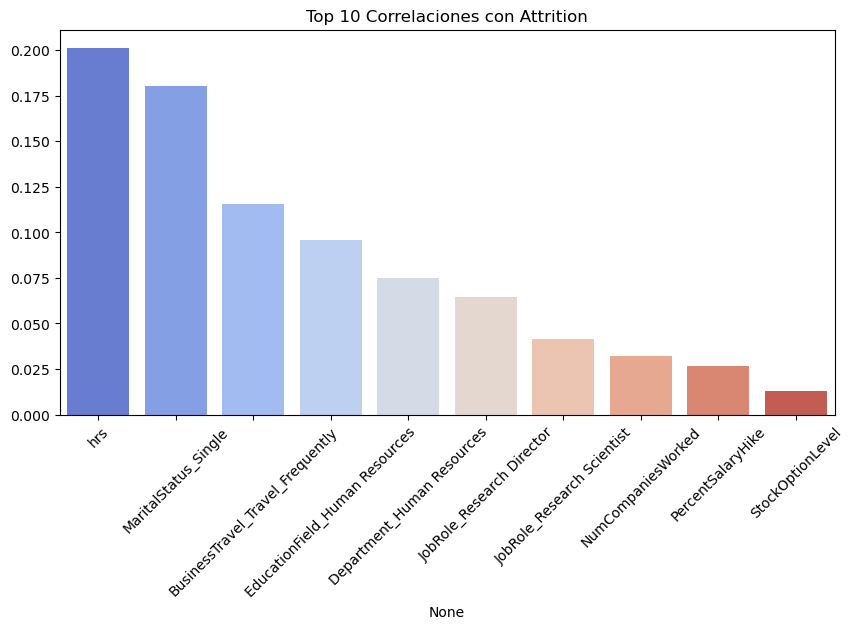

In [199]:
# Añadir la columna de 'Attrition' ya que la necesitamos para ver la correlación
processed_df['Attrition'] = data_df['Attrition']

processed_df['Attrition'] = processed_df['Attrition'].map({'Yes': 1, 'No': 0})  # Como es categórica la cambiamos para su análisis

# Calcular la correlación de todas las variables con 'Attrition'
correlation_with_attrition = processed_df.corr()['Attrition'].sort_values(ascending=False)


# Seleccionar las 10 variables con la mayor correlación para mostrarlas
top_n = 10 
top_correlation = correlation_with_attrition[1:top_n+1]  # Excluimos 'Attrition' que siempre tendrá correlación 1

plt.figure(figsize=(10, 5))
sns.barplot(x=top_correlation.index, y=top_correlation.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title(f"Top {top_n} Correlaciones con Attrition")
plt.show()

Esto indica que las horas de trabajo están fuertemente relacionadas al igual que si nuestro trabajador está casado o no.

Aun no hemos comprobado que variables son innecesarias y, por tanto, se pueden eliminar, como aquellas constantes

In [200]:
# Identificar columnas constantes
constant_columns = [col for col in data_df.columns if data_df[col].nunique() == 1]

# Eliminar las columnas constantes del dataframe
data_df = data_df.drop(columns=constant_columns)

# Mostrar las columnas eliminadas
print(f"Columnas eliminadas (constantes): {constant_columns}")

Columnas eliminadas (constantes): ['EmployeeCount', 'Over18', 'StandardHours']


Codificamos la salida


In [201]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import preprocessing

import numpy as np

X = data_df.drop(columns=['Attrition'])  # Elimina la columna 'Attrition'
y = data_df['Attrition']  # Definir la variable objetivo

# Seleccionados train/test en modo stratify, ya que el dataset se encuentra desbalanceado
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

le = preprocessing.LabelEncoder()
le.fit(y)

y_test = le.transform(y_test)
y_train = le.transform (y_train)

## Creamos el clasificador
Por último, vamos a crear un `Pipeline` para unir el paso del preproceso, con el paso de entrenamiento del modelo.
Como el dataset se encuentra desbalanceado debemos incluir `class_weight='balanced'

In [202]:

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', tree.DecisionTreeClassifier(class_weight='balanced'))])